In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

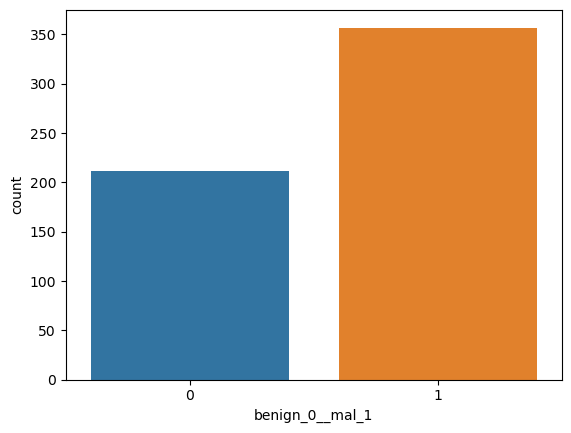

In [8]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

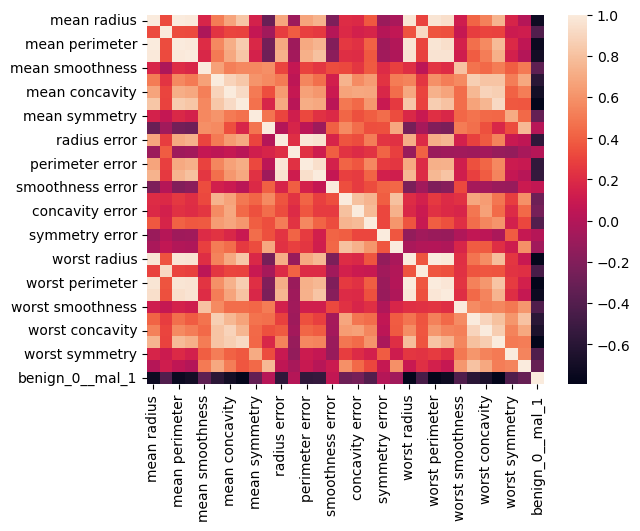

In [9]:
sns.heatmap(df.corr())

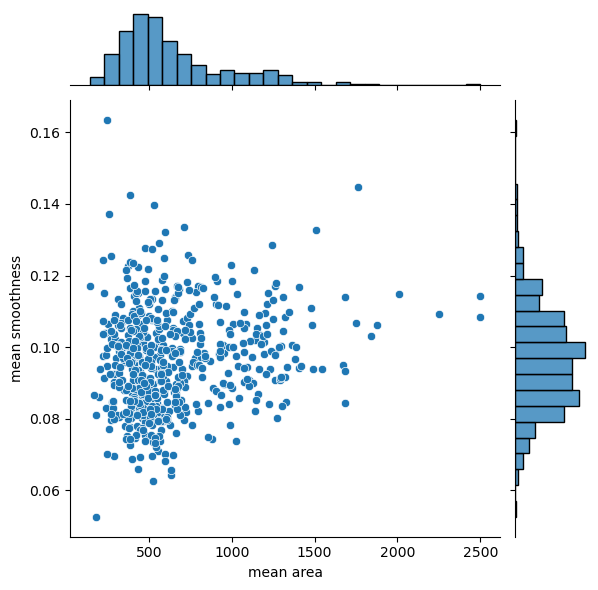

In [10]:
sns.jointplot(x='mean area', y='mean smoothness', data=df)

In [11]:
#sns.pairplot(data=df)

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [15]:
print("X_train's shape: ", X_train.shape)
print("y_train's shape: ", y_train.shape)
print("X_val's shape: ", X_val.shape)
print("y_val's shape: ", y_val.shape)
print("X_test's shape: ", X_test.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (341, 30)
y_train's shape:  (341,)
X_val's shape:  (114, 30)
y_val's shape:  (114,)
X_test's shape:  (114, 30)
y_test's shape:  (114,)


In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [20]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), batch_size=128, epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 127ms/step - loss: 0.7962 - val_loss: 0.7614
Epoch 2/200
3/3 [==============================] - 0s 28ms/step - loss: 0.7304 - val_loss: 0.7095
Epoch 3/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6807 - val_loss: 0.6674
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6382 - val_loss: 0.6300
Epoch 5/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6042 - val_loss: 0.5936
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 0.5707 - val_loss: 0.5572
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 0.5386 - val_loss: 0.5222
Epoch 8/200
3/3 [==============================] - 0s 24ms/step - loss: 0.5070 - val_loss: 0.4885
Epoch 9/200
3/3 [==============================] - 0s 21ms/step - loss: 0.4770 - val_loss: 0.4567
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 0.4485 - val_loss: 0.4263
Epoch 11/200
3/3 [

Epoch 84/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0444 - val_loss: 0.0576
Epoch 85/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0435 - val_loss: 0.0575
Epoch 86/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0429 - val_loss: 0.0575
Epoch 87/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0422 - val_loss: 0.0576
Epoch 88/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0415 - val_loss: 0.0578
Epoch 89/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0410 - val_loss: 0.0578
Epoch 90/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0402 - val_loss: 0.0574
Epoch 91/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0395 - val_loss: 0.0571
Epoch 92/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0389 - val_loss: 0.0567
Epoch 93/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0383 - val_loss: 0.0564
Epoch 94/2

3/3 [==============================] - 0s 23ms/step - loss: 0.0111 - val_loss: 0.0611
Epoch 167/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0110 - val_loss: 0.0614
Epoch 168/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0108 - val_loss: 0.0616
Epoch 169/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0105 - val_loss: 0.0611
Epoch 170/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0104 - val_loss: 0.0608
Epoch 171/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0101 - val_loss: 0.0604
Epoch 172/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0100 - val_loss: 0.0603
Epoch 173/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0099 - val_loss: 0.0603
Epoch 174/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0097 - val_loss: 0.0603
Epoch 175/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0096 - val_loss: 0.0609
Epoch 176/200


In [23]:
model.history.history

{'loss': [0.7961506247520447,
  0.7303601503372192,
  0.6807289123535156,
  0.6382497549057007,
  0.6041969656944275,
  0.5707030296325684,
  0.5385777950286865,
  0.5070422887802124,
  0.4770449101924896,
  0.44846948981285095,
  0.42040255665779114,
  0.39362832903862,
  0.3677172064781189,
  0.3437289297580719,
  0.32141178846359253,
  0.3008418083190918,
  0.28262344002723694,
  0.265220046043396,
  0.24988985061645508,
  0.23615920543670654,
  0.22315900027751923,
  0.21180640161037445,
  0.20190183818340302,
  0.19261044263839722,
  0.18381616473197937,
  0.17609752714633942,
  0.16888739168643951,
  0.16196882724761963,
  0.1558050662279129,
  0.1498098224401474,
  0.14429283142089844,
  0.13900211453437805,
  0.13428154587745667,
  0.12969565391540527,
  0.12543295323848724,
  0.12134458124637604,
  0.11741437762975693,
  0.1138368546962738,
  0.11026045680046082,
  0.10678914189338684,
  0.10384315997362137,
  0.1007719486951828,
  0.09799957275390625,
  0.09545775502920151,
 

In [24]:
loss = pd.DataFrame(model.history.history)

In [25]:
loss.head()

,loss,val_loss
0,0.796151,0.761384
1,0.730360,0.709526
2,0.680729,0.667366
3,0.638250,0.630031
4,0.604197,0.593606


<AxesSubplot:>

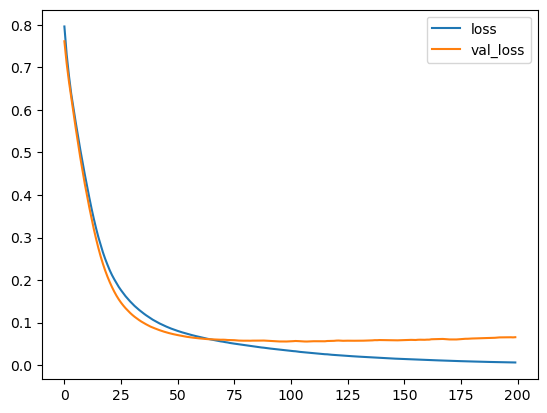

In [26]:
loss.plot()

In [27]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 7ms/step


In [28]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
    

In [29]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[39  1]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

